<a href="https://colab.research.google.com/github/Erickype/CiscoAnualInternetReport/blob/master/CiscoAnualReport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instalation

In [1]:
! sudo apt-get update
! sudo apt-get install texlive-latex-recommended
! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended
! wget http://mirrors.ctan.org/macros/latex/...
! unzip type1cm.zip -d /tmp/type1cm
! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins
! sudo mkdir /usr/share/texmf/tex/latex/type1cm
! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm
! sudo texhash
!apt install cm-super

Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [517 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease [18.1 kB]
Get:8 http://security.ubuntu.com/ubuntu jammy-security/multiverse amd64 Packages [44.0 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [1,144 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,287 kB]
Hit:12 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InReleas

In [2]:
!pip install PyLaTeX
!pip install pylatex[matrices]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for PyLaTeX: filename=PyLaTeX-1.4.1-py3-none-any.whl size=42790 sha256=b4d10ecfae7bdbbb5e88b31666b42805cc6dbb5cda16728f4de81762c2012381
  Stored in directory: /root/.cache/pip/wheels/7d/6d/a1/716565cec073a7ccebc1eb9a7c061658a75d5559c16f0ee875
Successfully built PyLaTeX


## Sections

In [30]:
import matplotlib
from pylatex import Document, Section, Subsection, Command, Figure, SubFigure, Math
from pylatex.utils import italic, NoEscape

matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

import os

import numpy as np

In [31]:
class Fact:
  title = ""
  text = ""
  figureName = ""
  figurePath = ""
  growthName = ""
  growth = ""

def GetFigurePath(name):
   return os.path.join(os.path.dirname("./"), name)

### Resumen

In [32]:
resumen = Fact()
resumen.text = "La empresa Cisco presenta el reporte anual de internet que muestra las principales tendencias en cuanto al uso y alcance. Además, se muestran datos relacionados con el uso de dispositivos móviles y tecnologías emergentes y ya establecidas como las redes móviles 4G y 5G."

### Internet adopcion

#### Internet users

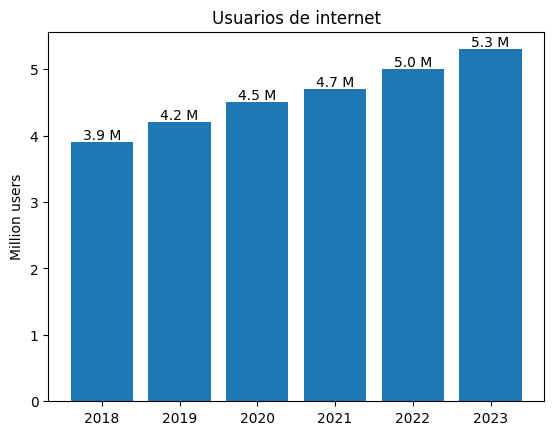

In [33]:
intAdoption = Fact()
intAdoption.title = "Adopción global de internet"
intAdoption.text = "Se evidencia un constante crecimiento en el número de usuarios en la figura 1, en la figura 2 se muestran los porcentajes de crecimiento evidenciando un declive en el crecimiento entre 2020 y 2021 a pesar de la adopción del enfoque remoto durante la pandemia por COVID -19. Desde el 2018 se evidencia un crecimiento de aproximadamente un 35% desmostrando el gran incremento de los usuarios en internet."
intAdoption.figureName = "intAdoption.png"
intAdoption.growthName = "internetCrecimiento.png"

## plot chart
years = ["2018", "2019", "2020", "2021", "2022", "2023"]
users = [3.9, 4.2, 4.5, 4.7, 5.0, 5.3]  # miles de millones

figure, ax = plt.subplots()

container = ax.bar(years, users)
ax.bar_label(container, fmt=lambda x: f'{x} M')

ax.set_ylabel('Million users')
ax.set_title('Usuarios de internet')

plt.show()

figure.savefig(intAdoption.figureName)
intAdoption.figurePath = GetFigurePath(intAdoption.figureName)

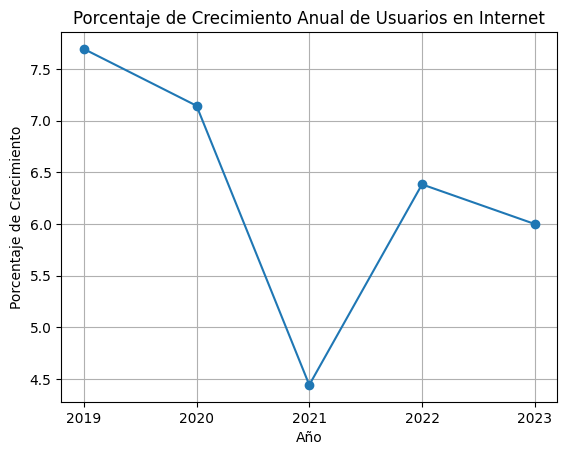

In [34]:
growth_rates = [((users[i] - users[i - 1]) / users[i - 1]) * 100 for i in range(1, len(users))]

plt.clf()
# Crear el gráfico
plt.plot(years[1:], growth_rates, marker='o', linestyle='-')
plt.title('Porcentaje de Crecimiento Anual de Usuarios en Internet')
plt.xlabel('Año')
plt.ylabel('Porcentaje de Crecimiento')
plt.grid(True)

# Guardar la figura
plt.savefig(intAdoption.growthName)

intAdoption.growthPath = GetFigurePath(intAdoption.growthName)

# Mostrar el gráfico
plt.show()

#### Devices and connections

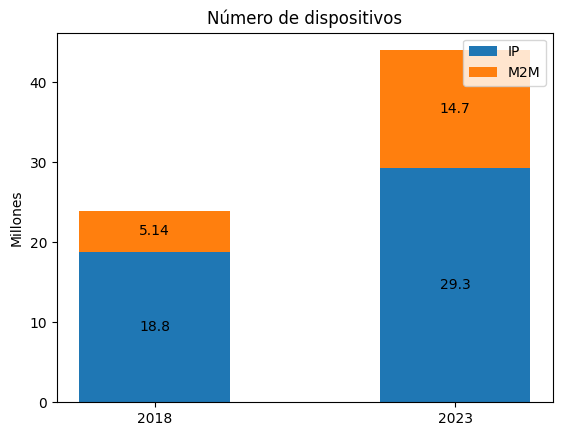

In [35]:
intDevices = Fact()
intDevices.title = "Uso de dispositivos"
intDevices.text = "Los dispositivos conectados directamente a internet en 2023 han aumentado en un 56.38% respecto a 2018, lo cual es un porcentaje significativamente y relevante, sin embargo, no se compara con el aumento del 185.2% de los dispositivos maquina a maquina (M2M), esto por el aumento en los dispositivos IoT en diversas áreas como el hogar, vehículos, monitores, cámaras de vigilancia. Esto demuestra la importancia de los dispositivos inteligentes en nuestro día a día."
intDevices.figureName = "intDevices.png"
intDevices.growthName = "intDevicesGrowth.png"

## plot chart
years = ("2018", "2023")
devices_counts = {
    "IP": np.array([18.8, 29.3]),
    "M2M": np.array([5.14, 14.7]),
}
width = 0.5

figure, ax = plt.subplots()
bottom = np.zeros(2)

for boolean, devices_count in devices_counts.items():
    p = ax.bar(years, devices_count, width, label=boolean, bottom=bottom)
    bottom += devices_count
    ax.bar_label(p, label_type='center')

ax.set_title("Número de dispositivos")
ax.set_ylabel("Millones")
ax.legend(loc="upper right")

plt.show()

figure.savefig(intDevices.figureName)
intDevices.figurePath = GetFigurePath(intDevices.figureName)

### Internet performance

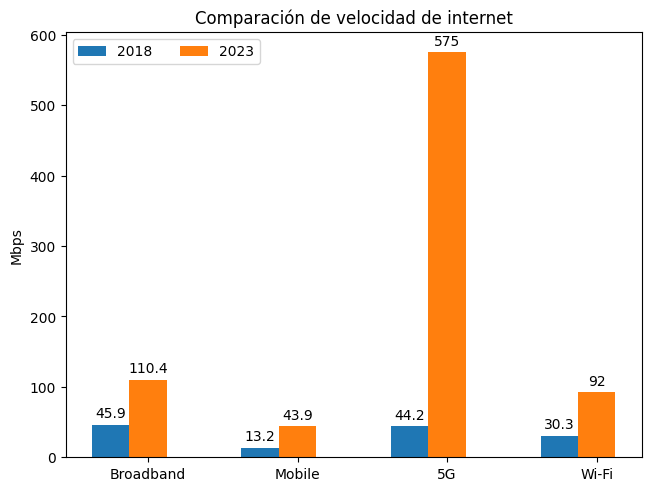

In [36]:
intPerformance = Fact()
intPerformance.title = "Desempeño global de la red"
intPerformance.text = "Los avances tecnológicos han elevado considerablemente la velocidad de internet, las velocidades en Mbps han llegado a duplicarse en las conexiones fijas, de mobil y wifi. Pero el caso más importante ha sido la velocidad en la tecnología 5G que a aumentado en 13 veces su velocidad mostrando el importante papel que cumple en el internet."
intPerformance.figureName = "intPerformance.png"
intPerformance.growthName = "intPerformanceGrowth.png"

aspects = ("Broadband", "Mobile", "5G", "Wi-Fi")
expectedIncrease = {
    '2018': (45.9, 13.2, 44.2, 30.3),
    '2023': (110.4, 43.9, 575, 92),
}

x = np.arange(len(aspects))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

figure, ax = plt.subplots(layout='constrained')

for attribute, measurement in expectedIncrease.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Mbps')
ax.set_title('Comparación de velocidad de internet')
ax.set_xticks(x + width, aspects)
ax.legend(loc='upper left', ncols=3)

plt.show()

figure.savefig(intPerformance.figureName)
intPerformance.figurePath = GetFigurePath(intPerformance.figureName)

###

## Document fill

In [37]:
def fill_document(doc, fname, width, *args, **kwargs):
    doc.append(resumen.text)

    ## Internet adoption
    with doc.create(Section(intAdoption.title)):
      doc.append(intAdoption.text)
      with doc.create(Figure(position='h!')) as intAdoptionFig:
            with doc.create(SubFigure(
                    position='b',
                    width=NoEscape(r'0.45\linewidth'))) as figure:

                figure.add_image(intAdoption.figurePath,
                                      width=NoEscape(r'\linewidth'))
                figure.add_caption('Usuarios de internet')
            with doc.create(SubFigure(
                    position='b',
                    width=NoEscape(r'0.45\linewidth'))) as growth:

                growth.add_image(intAdoption.growthPath,
                                       width=NoEscape(r'\linewidth'))
                growth.add_caption('Porcentaje crecimiento')
            intAdoptionFig.add_caption("Crecimiento de usuarios en internet")

      ### Devices and connetions
      with doc.create(Subsection(intDevices.title)):
        doc.append(intDevices.text)
        with doc.create(Figure(position='h!')) as intDevicesFig:
            intDevicesFig.add_image(intDevices.figurePath, width='200px')
            intDevicesFig.add_caption("Dispositivos internet")

    ## Internet performance
    with doc.create(Section(intPerformance.title)):
      doc.append(intPerformance.text)
      with doc.create(Figure(position='h!')) as intPerformanceFig:
            intPerformanceFig.add_image(intPerformance.figurePath, width='200px')
            intPerformanceFig.add_caption("Aumento desempeño de internet")


In [38]:
if __name__ == '__main__':
    # Document with `\maketitle` command activated
    doc = Document()

    doc.preamble.append(Command('title', 'Análisis de reporte anual de internet de Cisco'))
    doc.preamble.append(Command('author', 'Erick Carrasco'))
    doc.preamble.append(Command('date', NoEscape(r'\today')))
    doc.append(NoEscape(r'\maketitle'))

    fill_document(doc,'matplotlib_ex-dpi', r'1\textwidth', dpi=300)

    doc.generate_pdf('report', clean_tex=False)

In [39]:
from google.colab import files
files.download("report.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>